# Machine learning no supervisado

### Ejercicio

In [4]:
import pandas as pd

casas = {'Tamaño': [50, 60, 70, 80, 90, 100, None, 120],
         'Habitaciones': [1, 2, 2, 3, 3, 3, 4, 4],
         'Ubicacion': [1, 1, 2, 2, 3, 3, 4, 4], #1: centro, 4: periferia
         'Precio': [150000, 170000, 190000, 210000, 230000, 250000, 270000, 280000]
         }

df = pd.DataFrame(casas)
df['Tamaño'] = df['Tamaño'].fillna(df['Tamaño'].mean())
df.isnull().sum()

,0
Tamaño,0
Habitaciones,0
Ubicacion,0
Precio,0


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df[['Tamaño', 'Habitaciones', 'Ubicacion']]
y = df['Precio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42) #random_state asegura reproducibilidad entre divisiones

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.2f}')

#Precio = 50000 + 2000 * x1 + 10000 * x2 - 5000 * x3

MSE: 106432666.31


## PCA: maldicion de la dimensionalidad

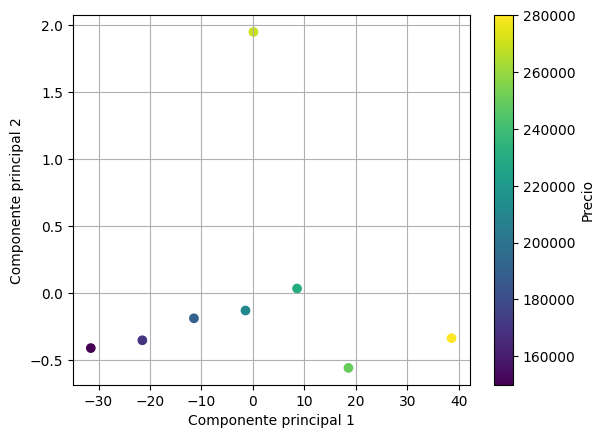

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components = 2) #para graficar solo se pueden poner 2 o 3, lo que permite explorar mejor los patrones o agrupacion de los datos
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y) # los [:, #] recorre los valores del componente principal de cada punto, mientras que el c representa
#los valores de cada punto respecto a la variable objetivo
plt.colorbar(label = 'Precio')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.grid()
plt.show()

#El PCA debe contemplar un minimo de varianza explicada, es decir la proporcion de variabilidad total en el conjunto de datos que se atribuyen a un modelo.
#Esto se puede observar con el grafico de codo, donde el codo se forma en el umbral de varianza

El objetivo de PCA es reconocer patrones en una mayor dimension. Los puntos mas calidos representan casas más caras.

### Ejercicios

In [18]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array([60, 80, 100]).reshape(-1, 1)
y = np.array([180000, 220000, 260000])

model = LinearRegression()
model.fit(X, y)

print(f'Intercepto: {model.intercept_:.0f}')
print(f'Pendiente: {model.coef_[0]:.0f}')
print(f'Prediccion para 90 m2: {model.predict([[90]])[0]:.0f}')

Intercepto: 60000
Pendiente: 2000
Prediccion para 90 m2: 240000


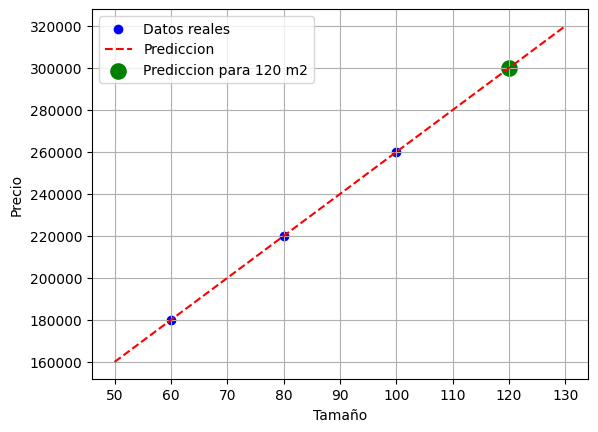

In [20]:
X = np.array([60, 80, 100, 120]).reshape(-1, 1)
y = np.array([180000, 220000, 260000, 300000])

tam = np.linspace(50, 130, 100)
precio_pred = 60000 + 2000 * tam

plt.scatter(X, y, color = 'blue', label = 'Datos reales')
plt.plot(tam, precio_pred, color = 'red', linestyle = '--', label = 'Prediccion')
plt.scatter(120, 300000, color = 'green', s = 120, label = 'Prediccion para 120 m2')
plt.xlabel('Tamaño')
plt.ylabel('Precio')
plt.legend()
plt.grid()
plt.show()

## Tipos de errores

In [30]:
from sklearn.preprocessing import PolynomialFeatures

estudiantes = {'Horas_estudio': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
               'Notas': [50, 60, 65, 70, 75, 80, 85, 90, 95, 98]}

df = pd.DataFrame(estudiantes)

model = LinearRegression()
model.fit(df[['Horas_estudio']], df['Notas'])
error_train = 1 - model.score(df[['Horas_estudio']], df['Notas'])
print(f'Error de entrenamiento: {error_train:.2f}')

X_train, X_test, y_train, y_test = train_test_split(df[['Horas_estudio']], df['Notas'], test_size= 0.2, random_state = 42)
model.fit(X_train, y_train)
error_test = 1 - model.score(X_test, y_test)
print(f'Error de prueba: {error_test:.2f}')

poly = PolynomialFeatures(degree = 10)
X_poly = poly.fit_transform(X_train)
model.fit(X_poly, y_train)

Error de entrenamiento: 0.01
Error de prueba: 0.02
